<a href="https://colab.research.google.com/github/Dalstrino/Desafio-TelecomX-Parte-1/blob/main/TelecomX_BR_Dieggo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

Importa o nescessario para funcionamento do código.

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário

customerID: número de identificação único de cada cliente <br>
Churn: se o cliente deixou ou não a empresa<br>
gender: gênero (masculino e feminino)<br>
SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos<br>
Partner: se o cliente possui ou não um parceiro ou parceira<br>
Dependents: se o cliente possui ou não dependentes<br>
tenure: meses de contrato do cliente<br>
PhoneService: assinatura de serviço telefônico<br>
MultipleLines: assisnatura de mais de uma linha de telefone<br>
InternetService: assinatura de um provedor internet<br>
OnlineSecurity: assinatura adicional de segurança online<br>
OnlineBackup: assinatura adicional de backup online<br>
DeviceProtection: assinatura adicional de proteção no dispositivo<br>
TechSupport: assinatura adicional de suporte técnico, menos tempo de espera<br>
StreamingTV: assinatura de TV a cabo<br>
StreamingMovies: assinatura de streaming de filmes<br>
Contract: tipo de contrato<br>
PaperlessBilling: se o cliente prefere receber online a fatura<br>
PaymentMethod: forma de pagamento<br>
Charges.Monthly: total de todos os serviços do cliente por mês<br>
Charges.Total: total gasto pelo cliente<br>



#📌 Extracão

Importa os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

In [237]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

dadosBrutos = pd.read_json(url)
dadosBrutos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [238]:
clienteNorm = pd.json_normalize(dadosBrutos['customer'])
telefoneNorm = pd.json_normalize(dadosBrutos['phone'])
internetNorm = pd.json_normalize(dadosBrutos['internet'])
contaNorm = pd.json_normalize(dadosBrutos['account'])

dadosBrutosDrop = dadosBrutos.drop(columns=['customer', 'phone', 'internet', 'account'])
dadosNorm = pd.concat([dadosBrutosDrop, clienteNorm, telefoneNorm, internetNorm, contaNorm], axis=1)
pd.set_option('display.max_columns', None)
display(dadosNorm)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Duplicados, Nulos e Vazios



#### Duplicados

In [239]:
print("Numero de duplicados", dadosNorm.duplicated().sum())

Numero de duplicados 0


#### Nulos

In [240]:
print("Numero de Nulos", dadosNorm.isnull().sum())

Numero de Nulos customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


#### Vazios

In [241]:
dadosNorm.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Corrindo vazios

In [242]:
dadosNorm = dadosNorm[dadosNorm['Churn'].str.strip() != '']

Alterando o tipo de *chargesTotal* para float



In [243]:
dadosNorm['Charges.Total'] = pd.to_numeric(dadosNorm['Charges.Total'], errors='coerce')

/tmp/ipython-input-3184553199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosNorm['Charges.Total'] = pd.to_numeric(dadosNorm['Charges.Total'], errors='coerce')


Verificando

In [244]:
dadosNorm.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Cria a coluna contas diarias para o futuro

In [245]:
dadosNorm['Contas_diarias'] = (dadosNorm['Charges.Monthly'] / 30).round(2)
display(dadosNorm)

/tmp/ipython-input-311403853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosNorm['Contas_diarias'] = (dadosNorm['Charges.Monthly'] / 30).round(2)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


### Padronizando

In [246]:
colunas_uteis = ['Churn','tenure','Contract','SeniorCitizen','PaperlessBilling','PaymentMethod','Charges.Monthly', 'Charges.Total']
dadosFinais = dadosNorm[colunas_uteis].copy()

dadosFinais = dadosFinais.rename(columns={"Churn":"PlanoCancelado","tenure":"MesesContrato", "Contract":"TipoContrato","SeniorCitizen":"ClienteSenior","PaperlessBilling":"PagamentoPapel","PaymentMethod":"MetodoPagamento",
                                   "Charges.Monthly":"TotalServicosPorMes","Charges.Total":"TotalGasto"})

dadosFinais['PagamentoPapel'] = dadosFinais['PagamentoPapel'].replace({"Yes": 1,"No": 0})
dadosFinais['PlanoCancelado'] = dadosFinais['PlanoCancelado'].replace({"Yes": 1,"No": 0})

dadosFinais = dadosFinais.replace(r'^\s+|\s+$', '', regex=True)
dadosFinais['TipoContrato'] = dadosFinais['TipoContrato'].astype(str)
dadosFinais['MetodoPagamento'] = dadosFinais['MetodoPagamento'].astype(str)
dadosFinais['PlanoCancelado'] = dadosFinais['PlanoCancelado'].replace(r'^\s*$', '0', regex=True)
dadosFinais['PlanoCancelado'] = dadosFinais['PlanoCancelado'].astype(int)

dadosFinais['MetodoPagamento'] = dadosFinais['MetodoPagamento'].replace(
    {"Electronic check": "Cheque Eletronico",
     "Mailed check":"Cheque Correio",
     "Credit card (automatic)":"Cartao de Credito (Automatico)",
     "Bank transfer (automatic)":"Transferencia Bancaria (Automatico)"}
)

dadosFinais['TipoContrato'] = dadosFinais['TipoContrato'].replace(
    {"Month-to-month":"Mensal",
    "One year":"Anual",
     "Two year":"Bienal"}
)

dadosFinais = dadosFinais.reset_index(drop=True)
dadosFinais = dadosFinais.sort_values(by="TotalServicosPorMes", ascending=False)
dadosFinais


/tmp/ipython-input-756952581.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosFinais['PagamentoPapel'] = dadosFinais['PagamentoPapel'].replace({"Yes": 1,"No": 0})
/tmp/ipython-input-756952581.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosFinais['PlanoCancelado'] = dadosFinais['PlanoCancelado'].replace({"Yes": 1,"No": 0})


,PlanoCancelado,MesesContrato,TipoContrato,ClienteSenior,PagamentoPapel,MetodoPagamento,TotalServicosPorMes,TotalGasto
5360,0,72,Bienal,0,1,Transferencia Bancaria (Automatico),118.75,8672.45
6345,0,71,Bienal,0,1,Cheque Eletronico,118.65,8477.60
4067,0,61,Anual,0,1,Cheque Eletronico,118.60,7365.70
4247,0,68,Bienal,0,0,Cheque Correio,118.60,7990.05
5824,1,67,Anual,0,1,Transferencia Bancaria (Automatico),118.35,7804.15
...,...,...,...,...,...,...,...,...
7011,0,25,Bienal,0,1,Cheque Correio,18.70,383.65
421,0,53,Bienal,0,0,Cheque Correio,18.70,1005.70
562,0,36,Bienal,0,1,Cartao de Credito (Automatico),18.55,689.00
6873,0,59,Bienal,0,0,Transferencia Bancaria (Automatico),18.40,1057.85


#📊 Carga e análise

Análise descritiva dos dados, calculando métricas de média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [247]:
dadosFinais.describe()

,PlanoCancelado,MesesContrato,ClienteSenior,PagamentoPapel,TotalServicosPorMes,TotalGasto
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,32.371149,0.162147,0.592219,64.761692,2283.300441
std,0.441561,24.559481,0.368612,0.491457,30.090047,2266.771362
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,0.000000,0.000000,35.500000,401.450000
50%,0.000000,29.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,55.000000,0.000000,1.000000,89.850000,3794.737500
max,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


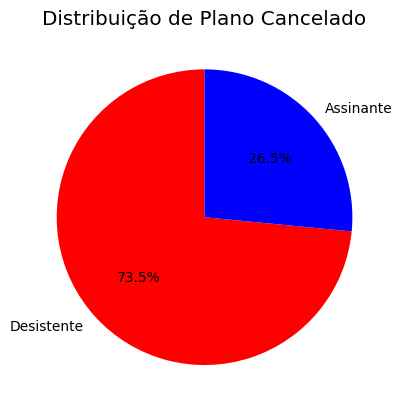

In [249]:
cores = ["red", "blue"]
plt.pie((dadosFinais['PlanoCancelado'].value_counts()),
        labels=['Desistente', 'Assinante'],
        colors = cores,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribuição de Plano Cancelado')
plt.show()

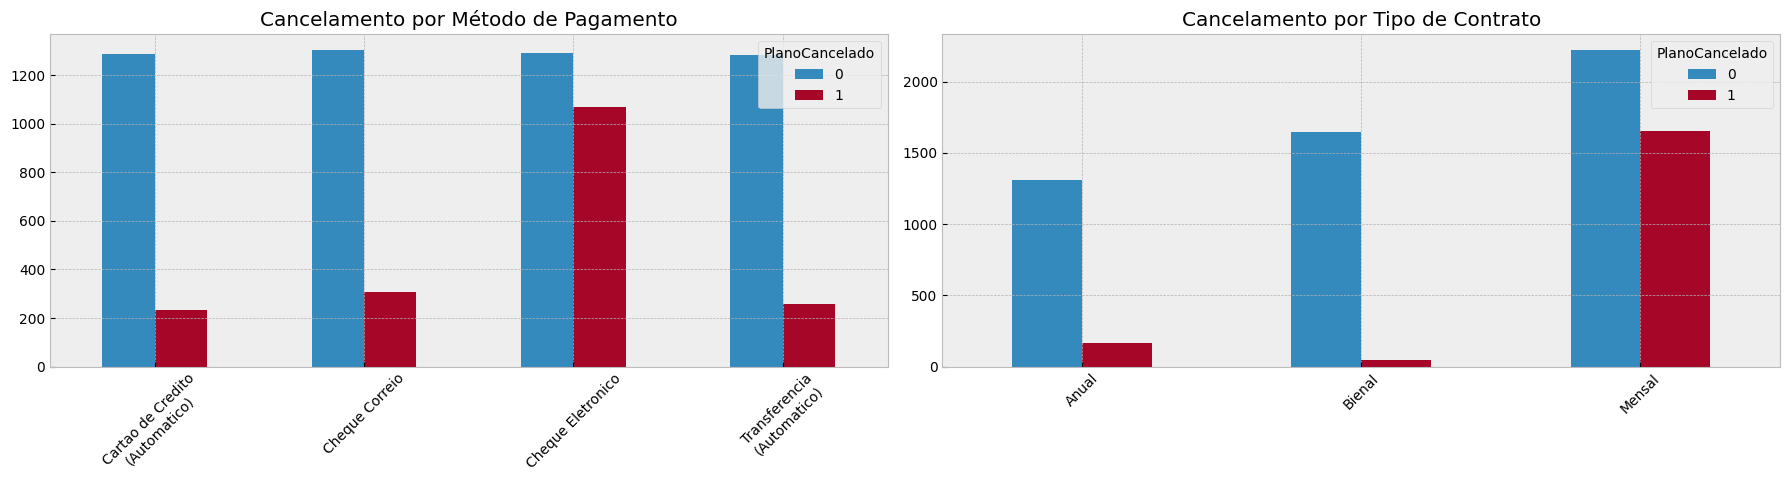

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))
grafico1 = pd.crosstab(dadosFinais['MetodoPagamento'],
                       dadosFinais['PlanoCancelado'])
grafico1.index = ['Cartao de Credito\n(Automatico)',
                  'Cheque Correio',
                  'Cheque Eletronico',
                  'Transferencia\n(Automatico)']
grafico1.plot(kind='bar', rot=45, ax=axes[0])
axes[0].set_title('Cancelamento por Método de Pagamento')


grafico2 = pd.crosstab(dadosFinais['TipoContrato'],
                       dadosFinais['PlanoCancelado'])
grafico2.index = ['Anual',
                  'Bienal',
                  'Mensal',]
grafico2.plot(kind='bar', rot=45, ax=axes[1])
axes[1].set_title('Cancelamento por Tipo de Contrato')

ax.grid(True, zorder=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3364070610.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Não', 'Sim'])


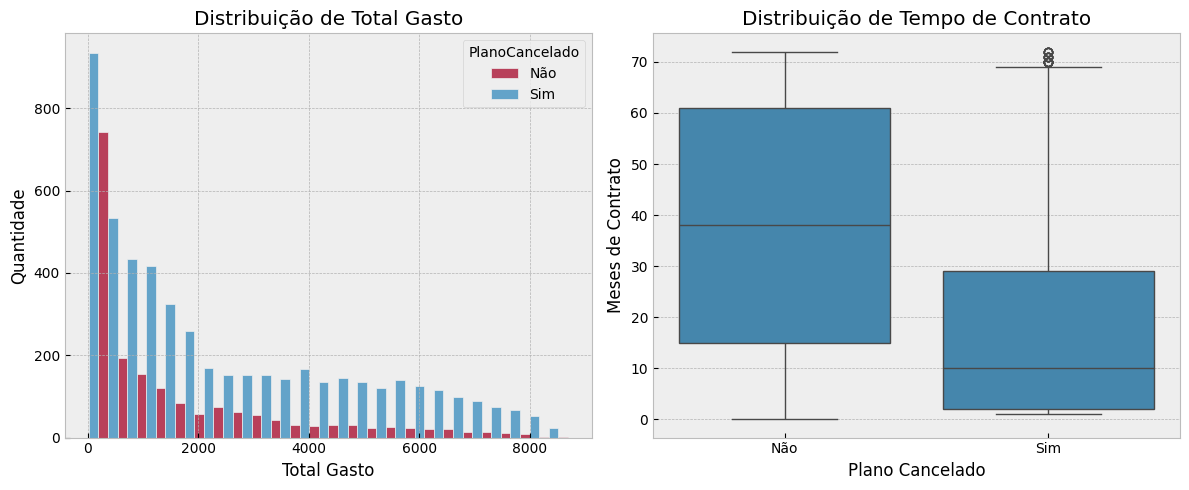

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=dadosFinais, x='TotalGasto', hue='PlanoCancelado', multiple='dodge', ax=axes[0])
axes[0].set_title('Distribuição de Total Gasto')
axes[0].set_xlabel('Total Gasto')
axes[0].set_ylabel('Quantidade')
axes[0].legend(title='PlanoCancelado', labels=['Não', 'Sim'])

sns.boxplot(data=dadosFinais, x='PlanoCancelado', y='MesesContrato', ax=axes[1])
axes[1].set_title('Distribuição de Tempo de Contrato')
axes[1].set_xticklabels(['Não', 'Sim'])
axes[1].set_xlabel('Plano Cancelado')
axes[1].set_ylabel('Meses de Contrato')


plt.tight_layout()
plt.show()

#📄Relatorio Final

#Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes da TelecomX com o objetivo de identificar os principais fatores que contribuem para a evasão de clientes (Churn).

# Limpeza e tratamento dos dados

Os dados foram carregados a partir de um arquivo JSON. Durante a fase de limpeza e tratamento, as seguintes etapas foram realizadas:
*   Os dados foram normalizados
*   Vericado e removidos os valores duplicados, nulos e vazio
*   Criado uma coluna chamada Contas_Diarias para analise futura
*   Foi selecionado algumas colunas consideradas como uteis
*   Traduzido os nomes das colunas
*   Trocados os Yes e No para 1 e 0 nas colunas validas
*   Removidos os caracteres especiais e ajustado os tipos das colunas
*   Traduzido os valores internos de algumas colunas

# Análise Exploratória de Dados
Foi feita uma analise descritiva dos dados calculando coisas como media, moda, media das tabelas selecionadas previamente e feito graficos da distribuição dos planos cancelados; de cancelamento por metodo de pagamento, por tipo de assinatura; do total gasto e de tempo de contrato.  

# Conclusões e Insights
A analise descritiva revela que a mediana (70,30%) e maior que a média (64,72%), revela que a maiora dos criente contribui com poucos valores. Fato confirmado pela moda (20,02%). Isso significa que a maior parte dos clientes gasta menos que um terço que a parte mais lucrativa.

Em relação as formas de pagamento, percebe-se que a maior parte dos cancelamentos ocorre entre clientes que utilizam cheque eletrônico. Isso revela que deve ter alguma dificuldade na hora de realizar esse procedimento.

Os tipos de contrato revelam que a maioria dos cancelamentos vem de assinantes com planos mensais. Isso sugere que os cliente assinam o plano e logo consumem o que os atraiu a assinar depois desistem da assinatura. Esse fato e confinado no gráfico de distribuição total de gasto, onde os que tem menores gastos tem maiores desistencias e no gráfico de tempo de contrato, onde os clientes desistentes saem entre 1 mes a 29 meses e cliente fieis duram ate 60 meses.

# Recomendações
*   Descobrir qual o problema por tras do cheque eletronico;
*   Incentivar pagamento por cartão, oferencendo discontos;
*   Descobrir qual das opções resulta em maior inscrição e focar em mais produtos do mesmo tipo;
*   Incentivar planos de pagamento mais longo, dando desconto para planos anuais e aumento o preço de planos mensais.


